Import files from Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Unzip archived dataset

In [2]:
!tar -xzf drive/MyDrive/dataset-binary-complete-separatechannels.tar.gz

Functions to create and delete folders and to divide the dataset in training, validation and testing sets

In [5]:
import os
import numpy as np
import shutil
import math
import random

def delete_folder(path):
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

def create_folder(path, overwrite=True):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created folder {path}")
    else:
        if overwrite == False:
            print(f"Couldn't substitute folder because overwrite is set to False")
        else:
            delete_folder(path)
            print(f"Substituted folder {path}")

"""
    inputs: in_paths  ---> list of input paths, where every path corresponds to a different label
            out_paths ---> names of training, validation and test folders, in this order
              ratios  ---> what fraction of the dataset goes into training, validation and testing
              seed    ---> seed used for randomization
"""
def create_dataset(in_paths, labels, out_paths, ratios, seed):
    if len(ratios) != 3 or len(out_paths) != 3:
        print("Output configuration is wrong")
        return

    if np.sum(ratios) > 1.0:
        print("Sum of ratios must be less than 1")
        return

    for out_path in out_paths:
        create_folder(out_path)
    for label_index, in_path in enumerate(in_paths):
        # label = in_path.split('/')[-2]
        label = labels[label_index]

        for (root, dirs, files) in os.walk(in_path, topdown=True):
            # number of elements in each split
            n_train = math.floor(ratios[0] * len(files))
            n_valid = math.floor(ratios[1] * len(files))
            n_test = len(files) - (n_train + n_valid)

            train_files = []
            valid_files = []
            test_files = []

            # create list of random indexes and shuffle it
            indexes = list(range(0, len(files)))
            random.Random(seed).shuffle(indexes)

            for j in range(0, len(files)):
                index = indexes[j]
                if j < n_train:
                    train_files.append(files[index])
                elif n_train <= j < n_train + n_valid:
                    valid_files.append(files[index])
                else:
                    test_files.append(files[index])

            for i, out_path in enumerate(out_paths):
                create_folder(out_path + label + "/")

                if i == 0:
                    for filename in train_files:
                        shutil.copyfile(in_path + filename, out_path + label +  "/" + filename)
                elif i == 1:
                    for filename in valid_files:
                        shutil.copyfile(in_path + filename, out_path + label +  "/" + filename)
                else:
                    for filename in test_files:
                        shutil.copyfile(in_path + filename, out_path + label +  "/" + filename)

# Create the binary dataset split

For the one with four classes, see next cell

In [12]:
correct_segments = "/content/dataset/c/"
wrong_segments = "/content/dataset/w/"
labels = ['c', 'w']

in_paths = [correct_segments, wrong_segments]

train_path = "/content/training-set/"
validation_path = "/content/validation-set/"
test_path = "/content/test-set/"

create_dataset(in_paths=in_paths, labels=labels, out_paths=[train_path, validation_path, test_path], ratios=[0.7, 0.2, 0.1], seed=2023)

Substituted folder /content/training-set/
Substituted folder /content/validation-set/
Substituted folder /content/test-set/
Created folder /content/training-set/c/
Created folder /content/validation-set/c/
Created folder /content/test-set/c/
Created folder /content/training-set/w/
Created folder /content/validation-set/w/
Created folder /content/test-set/w/


# Create the dataset with four classes

In [22]:
wrong_segments = "/content/dataset/w/"
new_dataset_path = "/content/dataset-4classes/"

labels = ['double', 'half', 'quadruple', 'quarter']

create_folder(new_dataset_path, overwrite=True)

in_paths = []

for label in labels:
    create_folder(new_dataset_path + label + "/")
    in_paths.append(new_dataset_path + label + "/")

# add spectrograms to subdirectories depending on the name of the file
for (root, dirs, files) in os.walk(wrong_segments, topdown=True):
    for filename in files:
        if "3,75ips_to15ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'quadruple' +  "/" + filename)
        elif "15ips_to3,75ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'quarter' +  "/" + filename)
        elif "3,75ips_to7,5ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'double' +  "/" + filename)
        elif "7,5ips_to15ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'double' +  "/" + filename)
        elif "15ips_to7,5ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'half' +  "/" + filename)
        elif "7,5ips_to3,75ips" in filename:
            shutil.copyfile(wrong_segments + filename, new_dataset_path + 'half' +  "/" + filename)


train_path = "/content/training-set/"
validation_path = "/content/validation-set/"
test_path = "/content/test-set/"

create_dataset(in_paths=in_paths, labels=labels, out_paths=[train_path, validation_path, test_path], ratios=[0.7, 0.2, 0.1], seed=1998)

Substituted folder /content/dataset-4classes/
Created folder /content/dataset-4classes/double/
Created folder /content/dataset-4classes/half/
Created folder /content/dataset-4classes/quadruple/
Created folder /content/dataset-4classes/quarter/
Substituted folder /content/training-set/
Substituted folder /content/validation-set/
Substituted folder /content/test-set/
Created folder /content/training-set/double/
Created folder /content/validation-set/double/
Created folder /content/test-set/double/
Created folder /content/training-set/half/
Created folder /content/validation-set/half/
Created folder /content/test-set/half/
Created folder /content/training-set/quadruple/
Created folder /content/validation-set/quadruple/
Created folder /content/test-set/quadruple/
Created folder /content/training-set/quarter/
Created folder /content/validation-set/quarter/
Created folder /content/test-set/quarter/


# Define model structure
For the binary model select last layer with sigmoid activation. Otherwise, select the softmax one

In [23]:
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, AveragePooling2D

from keras import models

my_model = models.Sequential()
my_model.add(Conv2D(8, (7, 7), activation='relu', padding='same', input_shape=(128, 256, 1)))
my_model.add(MaxPooling2D((5, 5), padding='same'))

my_model.add(Conv2D(16, (7, 7), activation='relu', padding='same'))
my_model.add(MaxPooling2D((5, 5), padding='same'))

my_model.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
my_model.add(MaxPooling2D((5, 5), padding='same'))

my_model.add(GlobalAveragePooling2D())

my_model.add(Dense(32, activation='relu'))
my_model.add(Dropout(0.2))

my_model.add(Dense(4, activation='softmax'))
# my_model.add(Dense(2, activation='sigmoid'))

my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 256, 8)       400       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 52, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 52, 16)        6288      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 11, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 11, 32)         25120     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 3, 32)         

# Compile the model
For the binary model, select the binary_crossentropy loss function, otherwise the categorical_crossentropy

In [24]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

mc = ModelCheckpoint('model/', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

cb_list = [es, mc]

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training  

In [25]:
import cv2
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 20

data_generator = ImageDataGenerator(preprocessing_function=None)

train_generator = data_generator.flow_from_directory('/content/training-set',
                                                     target_size = (128, 256),
                                                     batch_size=batch_size,
                                                     color_mode='grayscale',
                                                     class_mode='categorical')

validation_generator = data_generator.flow_from_directory('/content/validation-set',
                                                     target_size = (128, 256),
                                                     color_mode='grayscale',
                                                     batch_size=batch_size,
                                                     class_mode='categorical')

n_train = len(train_generator.filenames)
n_valid = len(validation_generator.filenames)

history = my_model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch = n_train//batch_size,
    validation_data=validation_generator,
    validation_steps=n_valid//batch_size,
    callbacks=cb_list
)



Found 1850 images belonging to 4 classes.
Found 527 images belonging to 4 classes.
Epoch 1/30
88/92 [===========================>..] - ETA: 0s - loss: 2.8861 - accuracy: 0.3177
Epoch 00001: val_accuracy improved from -inf to 0.52500, saving model to model/
92/92 [==============================] - 5s 41ms/step - loss: 2.8118 - accuracy: 0.3268 - val_loss: 1.2160 - val_accuracy: 0.5250
Epoch 2/30
91/92 [============================>.] - ETA: 0s - loss: 1.0809 - accuracy: 0.5315
Epoch 00002: val_accuracy improved from 0.52500 to 0.73077, saving model to model/
92/92 [==============================] - 3s 37ms/step - loss: 1.0794 - accuracy: 0.5322 - val_loss: 0.7207 - val_accuracy: 0.7308
Epoch 3/30
91/92 [============================>.] - ETA: 0s - loss: 0.8192 - accuracy: 0.6597
Epoch 00003: val_accuracy improved from 0.73077 to 0.77308, saving model to model/
92/92 [==============================] - 5s 52ms/step - loss: 0.8153 - accuracy: 0.6612 - val_loss: 0.5924 - val_accuracy: 0.7731

# Testing

The test ouputs the fraction of the test samples which have been correctly classified

In [26]:
from keras.models import load_model
import numpy as np

# model = my_model
model = load_model('model')

# generate data for test set of images
test_generator = data_generator.flow_from_directory(
        '/content/test-set/',
        target_size=(128, 256),
        color_mode='grayscale',
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

filenames=test_generator.filenames
n_test = len(filenames)

# obtain predicted activation values for the last dense layer
test_generator.reset()
pred=model.predict(test_generator, verbose=1, steps=n_test)

# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
actual_labels=test_generator.labels
class_labels = list(test_generator.class_indices.keys())

# determine the test set accuracy
match=[]
for i in range(0, n_test):
    match.append(predicted_class_indices[i]==actual_labels[i])

acc = str(match.count(True) / n_test * 100)[0:4]
print(f"The model predicted accurately {acc}% of the samples")

Found 267 images belonging to 4 classes.
267/267 [==============================] - 1s 3ms/step
The model predicted accurately 98.8% of the samples


# Plotting the results

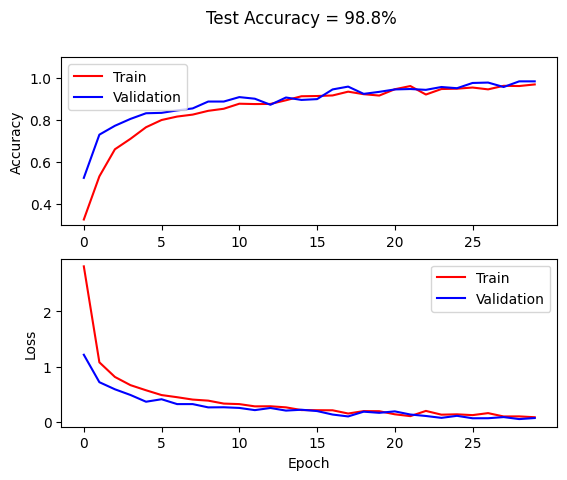

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
title = "Test Accuracy = " + acc + "%"
fig.suptitle(title)
axs[0].plot(history.history['accuracy'], color='r')
axs[0].plot(history.history['val_accuracy'], color='b')
axs[1].plot(history.history['loss'], color='r')
axs[1].plot(history.history['val_loss'], color='b')

axs[0].set_ylim([.3, 1.1])
axs[0].set_xticks(range(0, len(history.history['accuracy']), 5))
axs[1].set_xticks(range(0, len(history.history['accuracy']), 5))

axs[0].set_ylabel('Accuracy')
axs[1].set_ylabel('Loss')

axs[1].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')
axs[1].legend(['Train', 'Validation'], loc='upper right')
plt.savefig("plot.png", dpi=300)

# For the model with four classes, plot the confusion matrix

<ipython-input-28-e38102b87fce>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
<ipython-input-28-e38102b87fce>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])


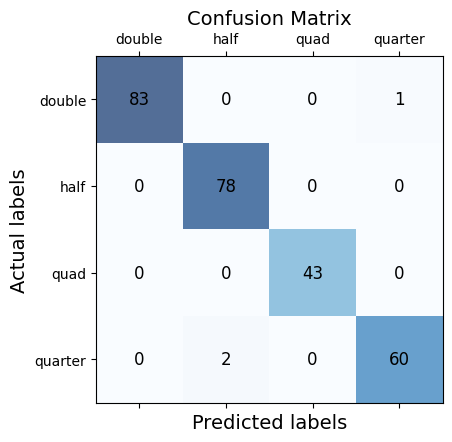

In [28]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=actual_labels, y_pred=predicted_class_indices)

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('Actual labels', fontsize=14)
ax.xaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
ax.yaxis.set_ticklabels(['', 'double', 'half', 'quad', 'quarter'])
plt.title('Confusion Matrix', fontsize=14)
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

# Save the model as an archive for downloading

In [29]:
!rm model/plot.png
!rm model/confusion_matrix.png
!mv plot.png model/
!mv confusion_matrix.png model/
!zip -r ./folder.zip ./model/

rm: cannot remove 'model/confusion_matrix.png': No such file or directory
  adding: model/ (stored 0%)
  adding: model/confusion_matrix.png (deflated 20%)
  adding: model/fingerprint.pb (stored 0%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: model/variables/variables.index (deflated 63%)
  adding: model/assets/ (stored 0%)
  adding: model/saved_model.pb (deflated 87%)
  adding: model/plot.png (deflated 14%)
  adding: model/keras_metadata.pb (deflated 92%)


In [19]:
!rm -r /content/test-set/
!rm -r /content/training-set/
!rm -r /content/validation-set/